In [55]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
pd.options.mode.chained_assignment = None  
from scipy import optimize,interpolate
import sklearn 
from sklearn.cluster import DBSCAN
#%run Routines_and_data/extract_func_3D.py
%run ROUTINES/gauss.py
%run ROUTINES/gauss_asym.py
import scipy
from lmfit import Model
from mpl_point_clicker import clicker


In [56]:
print(pd.__version__)

0.23.4


In [57]:
%matplotlib widget

## Property Data

In [124]:
id_halo = '11'
df = pd.read_csv(f'DATA/processed/TracingPoints/data_rho_{id_halo}_.csv')

Xs    = df.x
Ys    = df.y
prop_final = df.rho_resta_final_exp

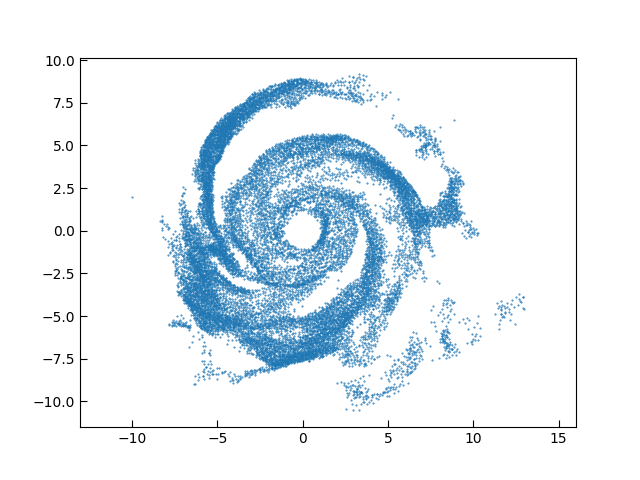

In [125]:
%matplotlib widget

import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

# Graficar puntos
plt.scatter(Xs, Ys, s=0.2)

# Ajustar los ejes a la misma escala
plt.axis('equal')

plt.show()


In [126]:
b=0.4 #valor david b=0.4
min_prop  = np.min(prop_final[ np.absolute(Ys) < b])

Xs_band   = Xs[ (np.absolute(Ys) < b) ]
Ys_band   = Ys[ (np.absolute(Ys) < b) ]
prop_band = prop_final[ np.absolute(Ys) < b]-min_prop

In [127]:
prop_band

3        5.115457e-05
9        5.600193e-05
11       2.657228e-05
16       4.036918e-05
23       4.695620e-05
27       5.463010e-05
30       3.076149e-05
33       4.454749e-05
37       4.802335e-05
39       2.030011e-05
41       1.676295e-05
44       4.788538e-05
48       4.052888e-05
49       2.866081e-05
54       2.153860e-05
59       3.255810e-05
63       2.536056e-05
68       4.638639e-05
73       5.480814e-05
75       4.941668e-05
78       3.847669e-05
87       1.719649e-05
91       3.907220e-05
95       2.773887e-05
97       5.041866e-05
101      2.238870e-05
102      2.342471e-05
103      2.118979e-05
108      5.753832e-05
110      4.822427e-05
             ...     
16165    4.642246e-05
16172    2.378317e-05
16182    1.641484e-05
16195    9.258810e-06
16206    4.701520e-05
16230    5.934513e-07
16233    3.271643e-05
16234    4.678128e-05
16265    8.257092e-05
16266    7.491924e-05
16272    6.681383e-05
16274    9.897089e-06
16282    1.351651e-05
16285    5.339811e-05
16295    2

In [128]:
Xs_band

3         1.046754
9         1.083495
11        1.211977
16        1.049608
23        1.104243
27        1.064232
30        1.124527
33        1.147828
37        1.212377
39        1.199238
41        1.260976
44        0.992314
48        1.333319
49        1.114531
54        1.196808
59        1.233493
63        1.274591
68        1.164553
73        1.082667
75        1.047397
78       -1.126161
87        1.276711
91        1.369738
95        1.366889
97        1.192085
101       1.336953
102       1.243187
103       1.342580
108      -1.069890
110       1.344393
           ...    
16165     8.396679
16172     8.351545
16182     8.863294
16195     9.456886
16206     8.217167
16230     9.808455
16233     9.665421
16234     9.741461
16265     9.802875
16266     9.823259
16272     9.716186
16274     9.853842
16282     9.573780
16285     9.944780
16295     9.446305
16303     9.510982
16304     8.731975
16320    10.153568
16330     9.590327
16338     9.789788
16343    10.032102
16347     9.

In [129]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False


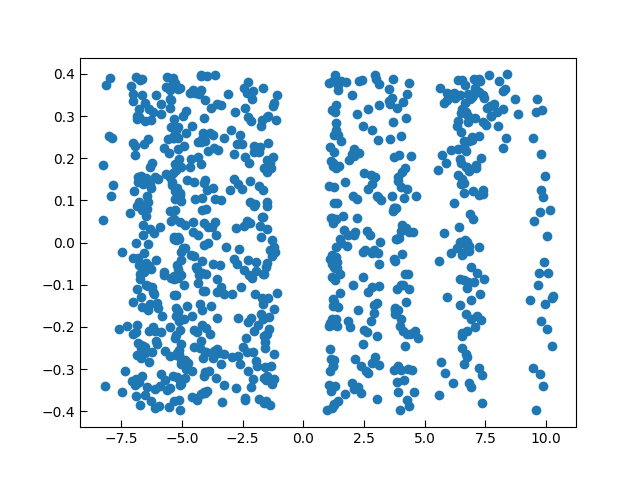

In [130]:
%matplotlib widget
plt.scatter(Xs_band, Ys_band,alpha=1);


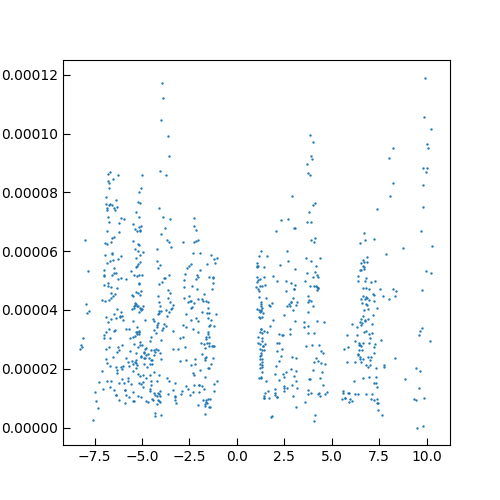

In [131]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Xs_band, prop_band,s=0.5,alpha=1)

#ax.set_xlim()

## Arm Tracing Points Data

In [179]:
samplig_freq=1
df_arm1 = pd.read_csv(f'DATA/processed/TracingPoints/arm_tracing_{id_halo}_arm1_rho_dani.csv')
df_arm1['arm'] = [1]*len(df_arm1)
df_arm1['id'] = np.arange(0,len(df_arm1),1)
df_arm1 = df_arm1[::samplig_freq].reset_index(drop=True)

df_arm2 = pd.read_csv(f'DATA/processed/TracingPoints/arm_tracing_{id_halo}_arm2_rho_dani.csv')
df_arm2['arm'] = [2]*len(df_arm2)
df_arm2['id'] = np.arange(0,len(df_arm2),1)
df_arm2 = df_arm2[::samplig_freq].reset_index(drop=True)

df_arms = pd.concat([df_arm1,df_arm2], axis = 0).reset_index(drop=True)

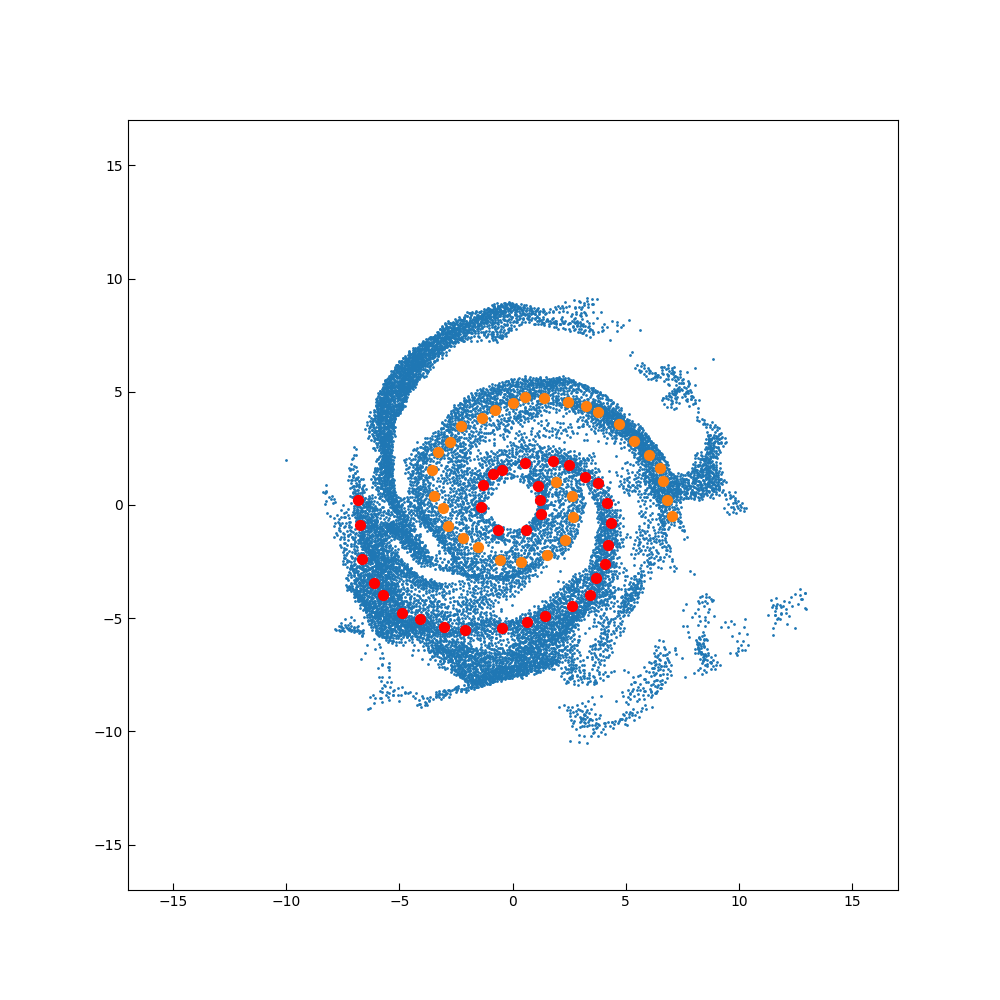

In [180]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm1.x, df_arm1.y, s = 50, color = 'red')
ax.scatter(df_arm2.x, df_arm2.y, s = 50, color = 'C1')
R = 17
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)
ax.set_aspect('equal')

## Rotations

In [134]:
def rotate(x, y, radians):
    x_rot = x * np.cos(radians) + y * np.sin(radians)
    y_rot = -x * np.sin(radians) + y * np.cos(radians)
    return {'x_rot':x_rot,'y_rot':y_rot}

In [135]:
def get_rotations(df_data, x_rot, y_rot):
    Xs = df_data.x
    Ys = df_data.y
    
    if x_rot > 0 and y_rot > 0 :
        a = np.arctan(y_rot/x_rot)
        return rotate(Xs, Ys, a), a

    elif x_rot < 0 and y_rot > 0:
        a = np.arctan(y_rot/x_rot) + np.pi
        return rotate(Xs, Ys, a), a    
    
    elif x_rot < 0 and y_rot < 0:
        a = np.arctan(y_rot/x_rot) + np.pi
        return rotate(Xs, Ys, a), a   
    
    elif x_rot > 0 and y_rot < 0:
        a = np.arctan(y_rot/x_rot) + 2*np.pi
        return rotate(Xs, Ys, a), a 

In [136]:
def get_rotated_arm_profile(prop, rotation_coords, b):
    x_rot = rotation_coords['x_rot']
    y_rot = rotation_coords['y_rot']
    
    min_prop  = np.min(prop[ np.absolute(y_rot)<b] )
    x_band = x_rot[ (np.absolute(y_rot)<b) ]
    y_band = prop[ np.absolute(y_rot)<b] - min_prop
    
    return {'x_band':x_band,'y_band':y_band}

In [137]:
b = 0.3

In [138]:
df_arm1['rotation_info'] = df_arm1.apply(lambda row: get_rotations(df, row.x, row.y), axis = 1)
df_arm1['rotation_coords'] = df_arm1.apply(lambda row: row.rotation_info[0], axis = 1)
df_arm1['alpha'] = df_arm1.apply(lambda row: row.rotation_info[1], axis = 1)
df_arm1['All_tracingPoints_rot'] = df_arm1.apply(lambda row: rotate(df_arm1.x, df_arm1.y, row.alpha), axis = 1)
df_arm1['This_tracingPoint_rot'] = df_arm1.apply(lambda row: rotate(row.x, row.y, row.alpha), axis = 1)
df_arm1['rotated_arm_profile'] = df_arm1.apply(lambda row: get_rotated_arm_profile(prop_final, row.rotation_coords, b), axis = 1)


df_arm2['rotation_info'] = df_arm2.apply(lambda row: get_rotations(df, row.x, row.y), axis = 1)
df_arm2['rotation_coords'] = df_arm2.apply(lambda row: row.rotation_info[0], axis = 1)
df_arm2['alpha'] = df_arm2.apply(lambda row: row.rotation_info[1], axis = 1)
df_arm2['All_tracingPoints_rot'] = df_arm2.apply(lambda row: rotate(df_arm2.x, df_arm2.y, row.alpha), axis = 1)
df_arm2['This_tracingPoint_rot'] = df_arm2.apply(lambda row: rotate(row.x, row.y, row.alpha), axis = 1)
df_arm2['rotated_arm_profile'] = df_arm2.apply(lambda row: get_rotated_arm_profile(prop_final, row.rotation_coords, b), axis = 1)



df_arms['rotation_info'] = df_arms.apply(lambda row: get_rotations(df, row.x, row.y), axis = 1)
df_arms['rotation_coords'] = df_arms.apply(lambda row: row.rotation_info[0], axis = 1)
df_arms['alpha'] = df_arms.apply(lambda row: row.rotation_info[1], axis = 1)
df_arms['All_tracingPoints_rot'] = df_arms.apply(lambda row: rotate(df_arms.x, df_arms.y, row.alpha), axis = 1)
df_arms['This_tracingPoint_rot'] = df_arms.apply(lambda row: rotate(row.x, row.y, row.alpha), axis = 1)
df_arms['rotated_arm_profile'] = df_arms.apply(lambda row: get_rotated_arm_profile(prop_final, row.rotation_coords, b), axis = 1)

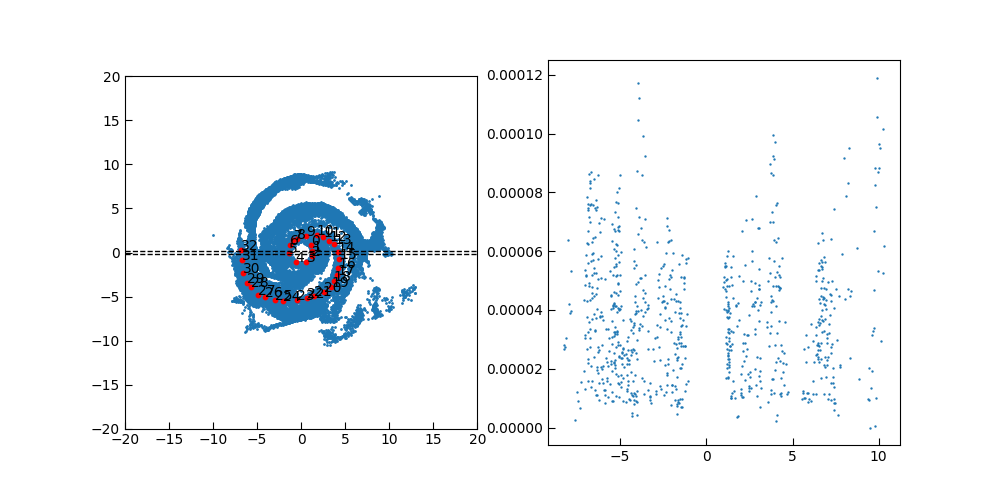

In [139]:
fig, (ax,ax2) = plt.subplots(figsize=(10,5), ncols = 2)
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm1.x, df_arm1.y, s = 10, color = 'red')
for i, row in df_arm1.iterrows():
    ax.text(row.x, row.y, str(int(row.id)))
R = 20
ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax2.scatter(Xs_band,prop_band,s=0.5,alpha=1)

ax.set_aspect('equal')

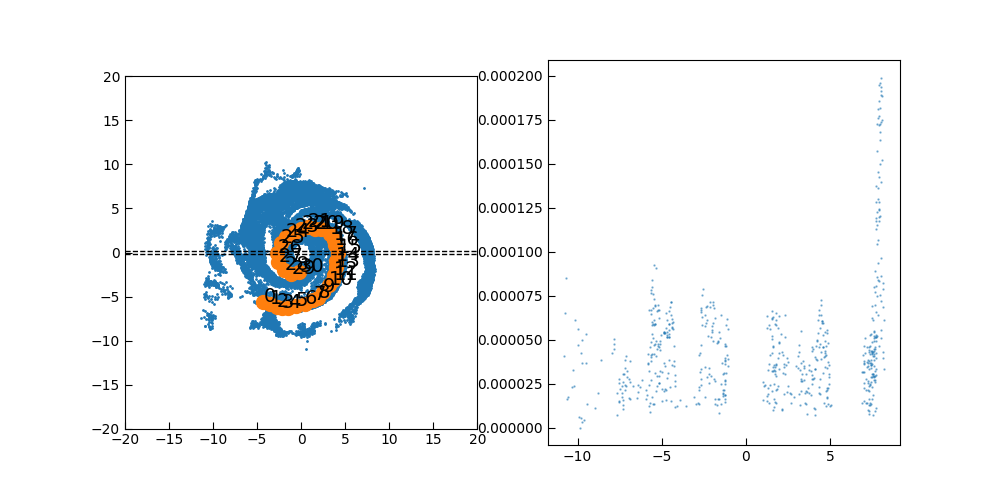

In [140]:
fig, (ax,ax2) = plt.subplots(figsize=(10,5), ncols = 2)
n = 15
ax.scatter(df_arm2.iloc[n].rotation_coords['x_rot'], df_arm2.iloc[n].rotation_coords['y_rot'], s = 1)
ax.scatter(df_arm2.iloc[n].All_tracingPoints_rot['x_rot'], df_arm2.iloc[n].All_tracingPoints_rot['y_rot'], s = 100)

for x, y, id in zip(df_arm2.iloc[n].All_tracingPoints_rot['x_rot'],df_arm2.iloc[n].All_tracingPoints_rot['y_rot'], df_arm2.id):
    ax.text(x, y, str(int(id)), fontsize = 14)

ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
R = 20
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax2.scatter(df_arm2.iloc[n].rotated_arm_profile['x_band'], df_arm2.iloc[n].rotated_arm_profile['y_band'], s = 0.5, alpha = 0.5)

ax.set_aspect('equal')

# Fitting Procedure

In [141]:
df_params = pd.DataFrame({
    'amplitude': [],
    'stderr_amplitude': [],
    'center': [],
    'stderr_center': [],
    'sigma': [],
    'stderr_sigma': [],
    'gamma': [],
    'stderr_gamma': [],
    'x': [],
    'y': [],
    'delta': [],
    'x_tracing': [],
    'y_tracing': [],
    'id_tracing': []
})


In [142]:
#df_params = pd.DataFrame(columns = ['amplitude','stderr_amplitude','center','stderr_center',
                                   # 'sigma','stderr_sigma','gamma','stderr_gamma',
                                   # 'x','y','delta','x_tracing','y_tracing','id_tracing'])

In [143]:
arm = df_arm2.copy(deep=True)

In [144]:
arm

x         y  arm  id  \
0   7.037338 -0.500406    2   0   
1   6.842532  0.239854    2   1   
2   6.647727  1.058036    2   2   
3   6.491883  1.642451    2   3   
4   6.024351  2.226867    2   4   
5   5.362013  2.811282    2   5   
6   4.699675  3.590503    2   6   
7   3.764610  4.096997    2   7   
8   3.258117  4.369724    2   8   
9   2.439935  4.564529    2   9   
10  1.387987  4.720373    2  10   
11  0.569805  4.759334    2  11   
12  0.024351  4.525568    2  12   
13 -0.793831  4.174919    2  13   
14 -1.339286  3.863231    2  14   
15 -2.274351  3.473620    2  15   
16 -2.780844  2.772321    2  16   
17 -3.287338  2.343750    2  17   
18 -3.560065  1.564529    2  18   
19 -3.482143  0.395698    2  19   
20 -3.053571 -0.110795    2  20   
21 -2.858766 -0.928977    2  21   
22 -2.196429 -1.435471    2  22   
23 -1.534091 -1.864042    2  23   
24 -0.560065 -2.448458    2  24   
25  0.375000 -2.526380    2  25   
26  1.543831 -2.214692    2  26   
27  2.323052 -1.552354    2  27   
28  2.673701 -0.539367    2  28   
29  2.634740  0.395698    2  29   
30  1.933442  1.019075    2  30   

                                        rotation_info  \
0   ({'x_rot': [-0.44350415701741497, -0.457357437...   
1   ({'x_rot': [-0.3389336499849233, -0.3471743341...   
2   ({'x_rot': [-0.21314809955074385, -0.214777119...   
3   ({'x_rot': [-0.11884284414484356, -0.115606503...   
4   ({'x_rot': [-0.006274380098499843, 0.002671980...   
5   ({'x_rot': [0.13016822861358823, 0.14589554760...   
6   ({'x_rot': [0.3060413021864013, 0.330275789569...   
7   ({'x_rot': [0.47860795723257715, 0.51090551341...   
8   ({'x_rot': [0.5730220646084936, 0.609589690557...   
9   ({'x_rot': [0.6999764908174789, 0.742085120051...   
10  ({'x_rot': [0.8477566130113204, 0.895896915809...   
11  ({'x_rot': [0.9421076847471315, 0.993679828486...   
12  ({'x_rot': [0.9915822804913004, 1.044677829533...   
13  ({'x_rot': [1.0459764150810065, 1.100079899149...   
14  ({'x_rot': [1.0612895406945002, 1.114819284404...   
15  ({'x_rot': [1.0361297530549645, 1.086134293043...   
16  ({'x_rot': [0.9663515173397488, 1.011036023575...   
17  ({'x_rot': [0.8813178201729229, 0.920404187429...   
18  ({'x_rot': [0.7421267503852047, 0.772765450333...   
19  ({'x_rot': [0.483767781693187, 0.4998132257347...   
20  ({'x_rot': [0.3376969508377561, 0.345871914249...   
21  ({'x_rot': [0.04858951478474083, 0.04177730594...   
22  ({'x_rot': [-0.2305325985401801, -0.2511480241...   
23  ({'x_rot': [-0.5295555709668285, -0.5641712700...   
24  ({'x_rot': [-0.8852030431360347, -0.9347614447...   
25  ({'x_rot': [-1.0377489374154705, -1.0918078591...   
26  ({'x_rot': [-1.0289683380654113, -1.0783515193...   
27  ({'x_rot': [-0.8629909652622025, -0.9009267351...   
28  ({'x_rot': [-0.5630694446633651, -0.5834890704...   
29  ({'x_rot': [-0.22225363370668086, -0.224356477...   
30  ({'x_rot': [0.13246449758456047, 0.14830461347...   

                                      rotation_coords     alpha  \
0   {'x_rot': [-0.44350415701741497, -0.4573574376...  6.212198   
1   {'x_rot': [-0.3389336499849233, -0.34717433412...  0.035039   
2   {'x_rot': [-0.21314809955074385, -0.2147771190...  0.157834   
3   {'x_rot': [-0.11884284414484356, -0.1156065036...  0.247801   
4   {'x_rot': [-0.006274380098499843, 0.0026719809...  0.354067   
5   {'x_rot': [0.13016822861358823, 0.145895547609...  0.482895   
6   {'x_rot': [0.3060413021864013, 0.3302757895690...  0.652395   
7   {'x_rot': [0.47860795723257715, 0.510905513414...  0.827653   
8   {'x_rot': [0.5730220646084936, 0.6095896905576...  0.930110   
9   {'x_rot': [0.6999764908174789, 0.7420851200511...  1.079898   
10  {'x_rot': [0.8477566130113204, 0.8958969158099...  1.284815   
11  {'x_rot': [0.9421076847471315, 0.9936798284866...  1.451640   
12  {'x_rot': [0.9915822804913004, 1.0446778295336...  1.565416   
13  {'x_rot': [1.0459764150810065, 1.1000798991496...  1.758696   
14  {'x_rot': [1.0612895406945002, 1.1148192844043...  1.904

(-2.5, 2.5)

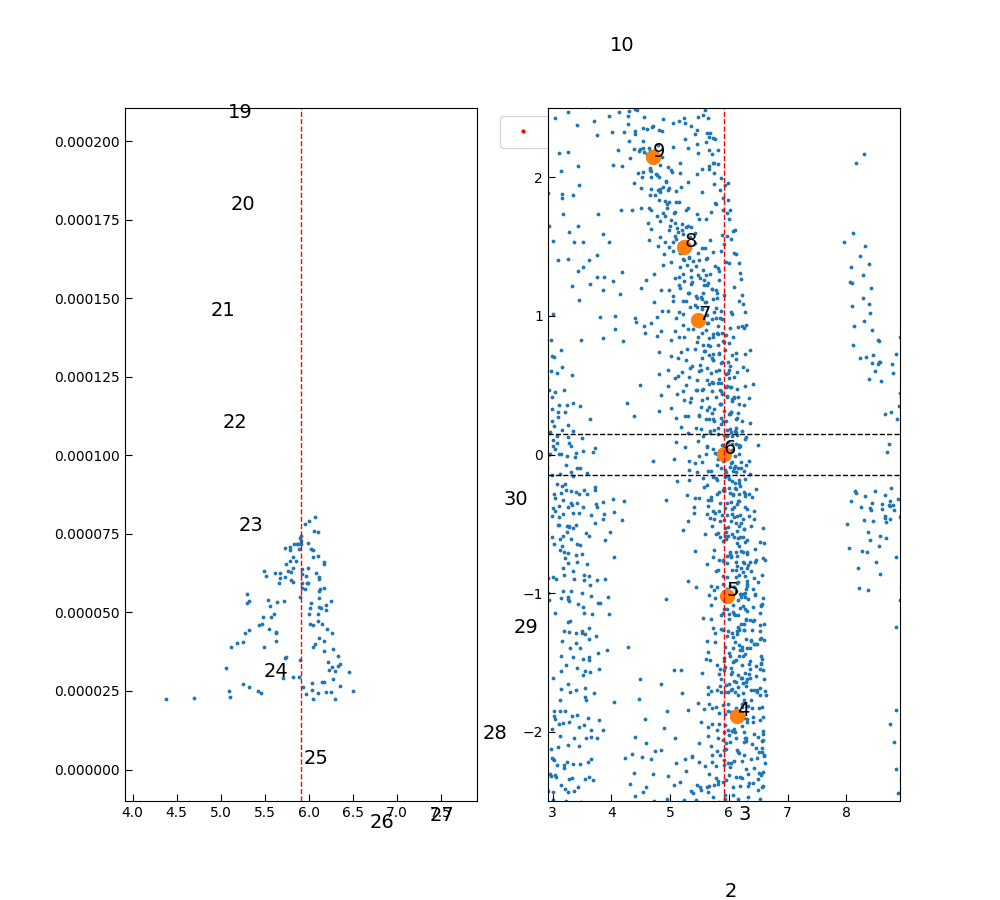

In [146]:
%matplotlib widget

n= 6 #n = 86
fig, (ax,ax2) = plt.subplots(figsize=(10,9), ncols = 2)

x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
y_tracing = arm.iloc[n].This_tracingPoint_rot['y_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--', color = 'red')
x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 3, alpha = 1)
#ax.set_xlim(0,np.max(x_band)+1)
ax.set_xlim(x_tracing-2,x_tracing+2)
klicker = clicker(ax, ["limits"], markers=["o"], colors = ['red'], markersize = 2)
x_tracing_all = arm.iloc[n].All_tracingPoints_rot['x_rot']
y_tracing_all = arm.iloc[n].All_tracingPoints_rot['y_rot']
x_coords = arm.iloc[n].rotation_coords['x_rot']
y_coords = arm.iloc[n].rotation_coords['y_rot']
ax2.scatter(x_coords, y_coords, s = 3)
ax2.scatter(x_tracing_all, y_tracing_all, s = 100)
for x, y, id in zip(x_tracing_all,y_tracing_all, arm.id):
    ax2.text(x, y, str(int(id)), fontsize = 14)
   
ax2.axvline(x = x_tracing, lw = 1, ls = '--', color = 'red')
ax2.axhline(y=b/2,ls='--',lw=1,color='black')
ax2.axhline(y=-b/2,ls='--',lw=1,color='black')
R = 20
ax2.set_xlim(x_tracing-3,x_tracing+3)
ax2.set_ylim(-2.5,2.5)

## %run Routines_and_data/gauss_asym.py

In [147]:
dict_lims = klicker.get_positions()
#print(dict_lims)

In [148]:
dict_lims

{'limits': array([[4.81272771e+00, 2.26907147e-05],
        [4.94898577e+00, 2.90572458e-05],
        [5.03982448e+00, 3.63787566e-05],
        [5.07388900e+00, 4.08353284e-05],
        [5.16472771e+00, 4.68835329e-05],
        [5.19879222e+00, 5.26134109e-05],
        [5.28963093e+00, 5.86616154e-05],
        [5.39182448e+00, 6.43914934e-05],
        [5.52808255e+00, 6.85297386e-05],
        [5.58485674e+00, 7.04396980e-05],
        [5.75517932e+00, 7.52145963e-05],
        [5.92550190e+00, 7.80795353e-05],
        [6.07311480e+00, 7.96711681e-05],
        [6.19801803e+00, 7.42596166e-05],
        [6.27750190e+00, 6.82114121e-05],
        [6.33427609e+00, 6.12082279e-05],
        [6.37969545e+00, 5.86616154e-05],
        [6.41375997e+00, 5.64333296e-05],
        [6.48188900e+00, 5.32500640e-05],
        [6.58408255e+00, 4.56102267e-05],
        [6.59543738e+00, 4.08353284e-05],
        [6.68627609e+00, 3.47871238e-05],
        [6.69763093e+00, 3.06488786e-05],
        [6.72034061e+00,

In [149]:
delta = 0.05
model = get_asym_gaussian_fit(dict_lims,arm,n,delta)

/home/daniel/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


In [150]:
n

6

(0.0, 7.933429982010067e-05)

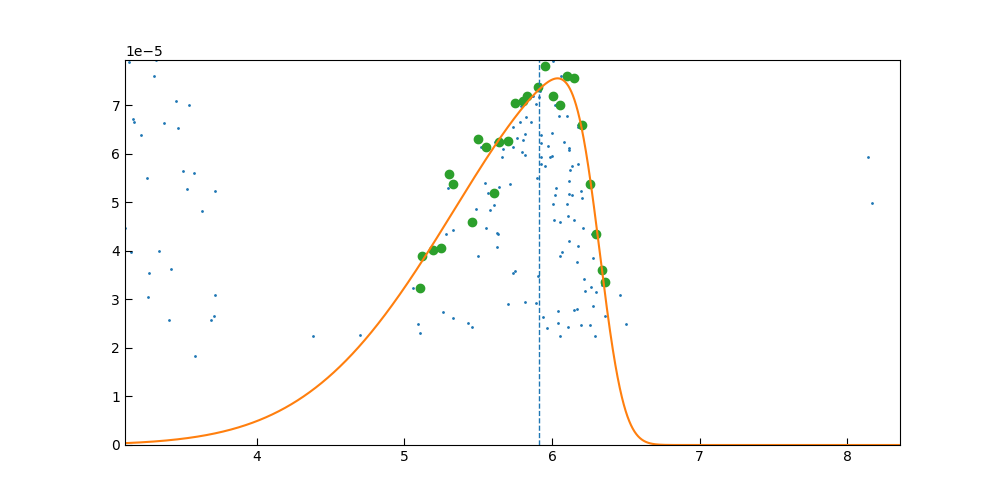

In [151]:
fig, ax = plt.subplots(figsize=(10,5))
x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--')

x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 1, alpha = 1, marker = 'o')

fitted_model = eval_fitted_model(model)
ax.plot(fitted_model['x_eval'], fitted_model['y_eval'], color = 'C1')
ax.scatter(model['x_max'], model['y_max'], color = 'C2', marker = 'o')

ax.set_xlim(np.min(fitted_model['x_eval']), np.max(fitted_model['x_eval']))
ax.set_ylim(np.min(fitted_model['y_eval']), np.max(fitted_model['y_eval'])+0.05*np.max(fitted_model['y_eval']))

In [152]:
fractured = False

In [153]:
model['x_max']

0     5.106236
1     5.121771
2     5.191175
3     5.250448
4     5.301952
5     5.327784
6     5.455286
7     5.497228
8     5.554817
9     5.605180
10    5.640642
11    5.703291
12    5.746159
13    5.803880
14    5.830981
15    5.903531
16    5.954886
17    6.003875
18    6.053449
19    6.103417
20    6.148463
21    6.200555
22    6.257251
23    6.295828
24    6.337999
25    6.358905
dtype: float64

In [154]:
list(model['x_max'])

[5.106235787813379,
 5.121770826388576,
 5.1911746779675845,
 5.250447928326363,
 5.301951533692688,
 5.327784085830282,
 5.455286130624065,
 5.497227519021115,
 5.554817036276287,
 5.605180421342361,
 5.640641873563034,
 5.703291161401388,
 5.746159309797358,
 5.803879709145535,
 5.830980758726137,
 5.903530705837325,
 5.9548855472070485,
 6.00387547218833,
 6.053449261015663,
 6.103416948293935,
 6.148463415258324,
 6.200554567777022,
 6.257251238546802,
 6.2958277836270025,
 6.337998698305425,
 6.358904978750497]

In [155]:
df_params = add_row_with_param_info(model, df_params, arm.iloc[n], delta, fractured)

/home/daniel/Documentos/UdeA/SpiralStructure_IllustrisTNG50/ROUTINES/gauss_asym.py:137: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, pd.DataFrame.from_records([dict_values])], ignore_index=True)


In [156]:
df_params.tail()

amplitude    center  delta fractured     gamma  id_tracing     sigma  \
0   0.000099  6.322286   0.05     False -7.494556         6.0  0.983863   

   stderr_amplitude  stderr_center  stderr_gamma  stderr_sigma  \
0          0.000003       0.010638      1.463635      0.049227   

                                                   x  x_tracing  \
0  [5.106235787813379, 5.121770826388576, 5.19117...   4.699675   

                                                   y  y_tracing  
0  [3.230718968436138e-05, 3.89390517177155e-05, ...   3.590503

In [157]:
df_params

amplitude    center  delta fractured     gamma  id_tracing     sigma  \
0   0.000099  6.322286   0.05     False -7.494556         6.0  0.983863   

   stderr_amplitude  stderr_center  stderr_gamma  stderr_sigma  \
0          0.000003       0.010638      1.463635      0.049227   

                                                   x  x_tracing  \
0  [5.106235787813379, 5.121770826388576, 5.19117...   4.699675   

                                                   y  y_tracing  
0  [3.230718968436138e-05, 3.89390517177155e-05, ...   3.590503

In [158]:
df_params['y']

0    [3.230718968436138e-05, 3.89390517177155e-05, ...
Name: y, dtype: object

In [159]:
n_actual = df_params.iloc[-1].name
params = df_params.iloc[n_actual]
params

amplitude                                                 9.86362e-05
center                                                        6.32229
delta                                                            0.05
fractured                                                       False
gamma                                                        -7.49456
id_tracing                                                          6
sigma                                                        0.983863
stderr_amplitude                                          3.23455e-06
stderr_center                                               0.0106381
stderr_gamma                                                  1.46364
stderr_sigma                                                0.0492273
x                   [5.106235787813379, 5.121770826388576, 5.19117...
x_tracing                                                     4.69968
y                   [3.230718968436138e-05, 3.89390517177155e-05, ...
y_tracing           

In [160]:
from shapely.geometry import LineString

def find_widths_of_skewed_gaussian_dani(params, dx=0.001):
    # Evaluar el modelo ajustado
    fitted_model = eval_fitted_model_with_given_params(params, dx=dx)
    x_eval = fitted_model['x_eval']
    y_eval = fitted_model['y_eval']

    # Encuentra el máximo
    x_max, y_max = find_maximum(x_eval, y_eval)

    # Generar la línea horizontal en y = y_max / 2
    xs_line = np.arange(np.min(x_eval), np.max(x_eval), 0.01)
    ys_line = np.full(len(xs_line), 0.5 * y_max)

    # Crear LineString para las dos líneas
    first_line = LineString(np.column_stack((x_eval, y_eval)))
    second_line = LineString(np.column_stack((xs_line, ys_line)))
    intersection = first_line.intersection(second_line)

    points_intercept = []

    # Si la intersección es un solo punto
    if intersection.geom_type == 'Point':
        points_intercept = [(intersection.x, intersection.y)]
    # Si la intersección es una colección de puntos
    elif hasattr(intersection, 'geoms'):
        points_intercept = [(point.x, point.y) for point in intersection.geoms]
    # Si no hay intersección
    elif intersection.is_empty:
        return {'x_max': x_max, 'y_max': y_max, 'w1': np.nan, 'w2': np.nan}

    # Asegurarse de que hay suficientes puntos de intersección
    if len(points_intercept) >= 2:
        w1 = x_max - points_intercept[1][0]
        w2 = points_intercept[0][0] - x_max
    else:
        w1, w2 = np.nan, np.nan  # Si no hay suficientes intersecciones

    return {'x_max': x_max, 'y_max': y_max, 'w1': w1, 'w2': w2}

def plot_fit_and_widths_dani(params, ax, dx=0.001):
    width_info = find_widths_of_skewed_gaussian_dani(params, dx=dx)

    dict_eval = eval_fitted_model_with_given_params(params, dx=dx)
    x_eval = dict_eval['x_eval']
    y_eval = dict_eval['y_eval']

    # Plotea la función ajustada
    ax.plot(x_eval, y_eval, lw=2.5, label='Fitted Function')

    # Máximos y anchos
    ax.axvline(x=width_info['x_max'], color='red', lw=1.5, label='x_max = {:.3f}'.format(width_info['x_max']))
    ax.axhline(y=width_info['y_max'], ls='--', color='k', label='y_max = {:.2e}'.format(width_info['y_max']))
    ax.axhline(y=0.5 * width_info['y_max'], color='green', lw=1.5, label='y_max / 2 = {:.2e}'.format(0.5 * width_info['y_max']))

    # Líneas verticales para w1 y w2
    ax.axvline(x=np.abs(width_info['x_max'] - width_info['w1']), color='magenta', lw=1.5, ls='--', label='w1 = {:.3f}'.format(width_info['w1']))
    ax.axvline(x=np.abs(width_info['x_max'] + width_info['w2']), color='purple', lw=1.5, ls='--', label='w2 = {:.3f}'.format(width_info['w2']))

    # Ajustar etiquetas de los ticks
    xt = ax.get_xticks()
    tick1 = '{:.2f}'.format(np.abs(width_info['x_max'] - width_info['w1']))
    tick2 = '{:.2f}'.format(np.abs(width_info['x_max'] + width_info['w2']))
    xt = np.append(xt, [float(tick1), float(tick2)])

    ax.set_xticks(xt)
    ax.set_xticklabels(xt)

    ax.grid(alpha=0.5, lw=1, ls='--')
    ax.legend(loc='upper left')



In [161]:
arm.iloc[n].id

6

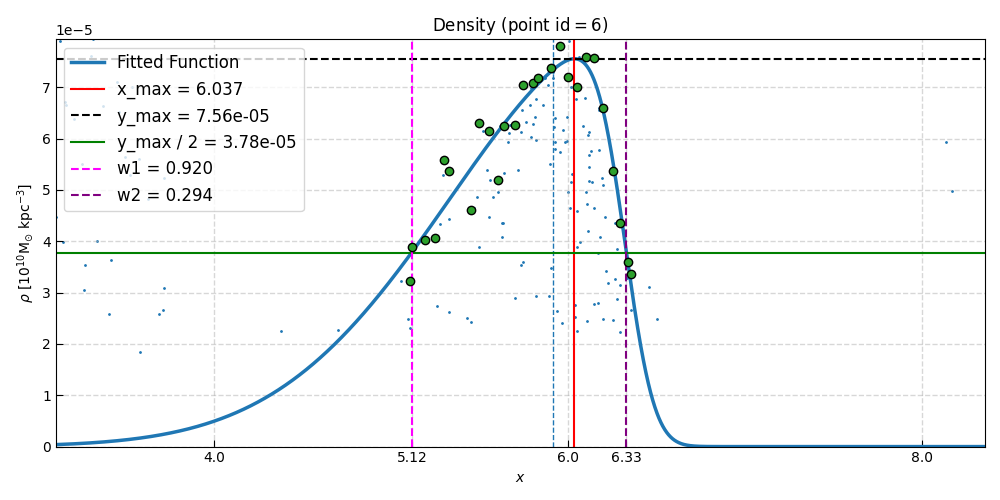

In [162]:
n_actual = df_params.iloc[-1].name
params = df_params.iloc[n_actual]
fig, ax = plt.subplots(figsize=(10,5))
x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--')

x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 1, alpha = 1)

fitted_model = eval_fitted_model(model)
ax.scatter(model['x_max'], model['y_max'], color = 'C2', marker = 'o',  linewidths = 1, edgecolors = 'k', zorder = 10)

ax.set_xlim(0,np.max(x_band)+1)
plot_fit_and_widths_dani(params, ax)
ax.set_xlim(np.min(fitted_model['x_eval']), np.max(fitted_model['x_eval']))
ax.set_ylim(np.min(fitted_model['y_eval']), np.max(fitted_model['y_eval'])+0.05*np.max(fitted_model['y_eval']))

ax.set_xlabel(r'$x$')
rho_units      = r"$ \rho \ [10^{10} \mathrm{M}_{\odot} \ \mathrm{kpc}^{-3}] $"
ax.set_ylabel(rho_units)
ax.set_title(r'$\mathrm{{Density}} \ (\mathrm{{point \ id}}={{{0}}})$'.format(arm.iloc[n].id))
fig.tight_layout()
fig.savefig(f'FIT_PLOTS/rho_point_id_{n}_arm2_halo{id_halo}_.png',dpi=200)

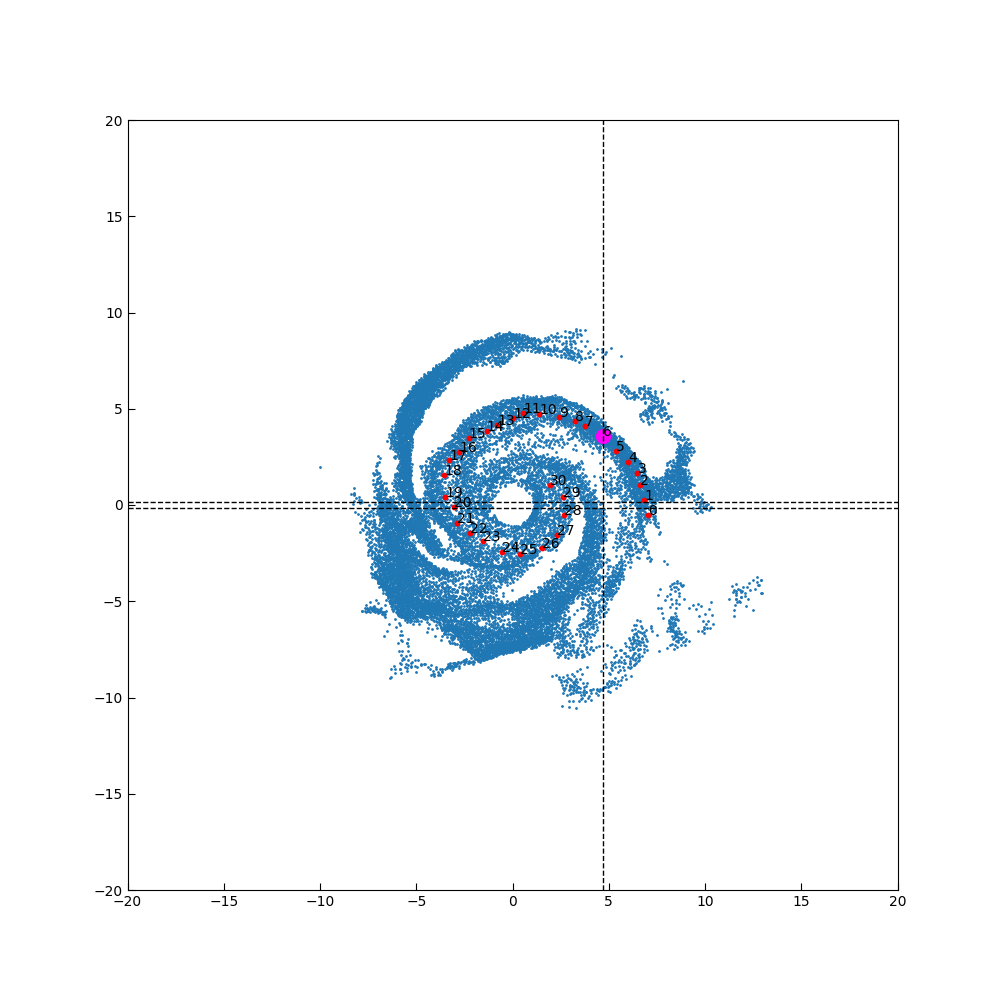

In [163]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm2.x, df_arm2.y, s = 10, color = 'red')
ax.scatter(df_params.iloc[n_actual].x_tracing,df_params.iloc[n_actual].y_tracing,color='magenta',s = 100)
ax.axvline(x=df_params.iloc[n_actual].x_tracing,ls='--',lw=1,color='black')

for i, row in df_arm2.iterrows():
    ax.text(row.x, row.y, str(int(row.id)))
R = 20
ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax.set_aspect('equal')

In [164]:
df_params.to_csv(f'FIT_INFO/fit_params_rho_arm2_adicionales_HALO{id_halo}_.csv', index = False)

In [166]:
df_params.to_csv('df_params_rho_arm2_adicionales_dani.csv')

## arm 1

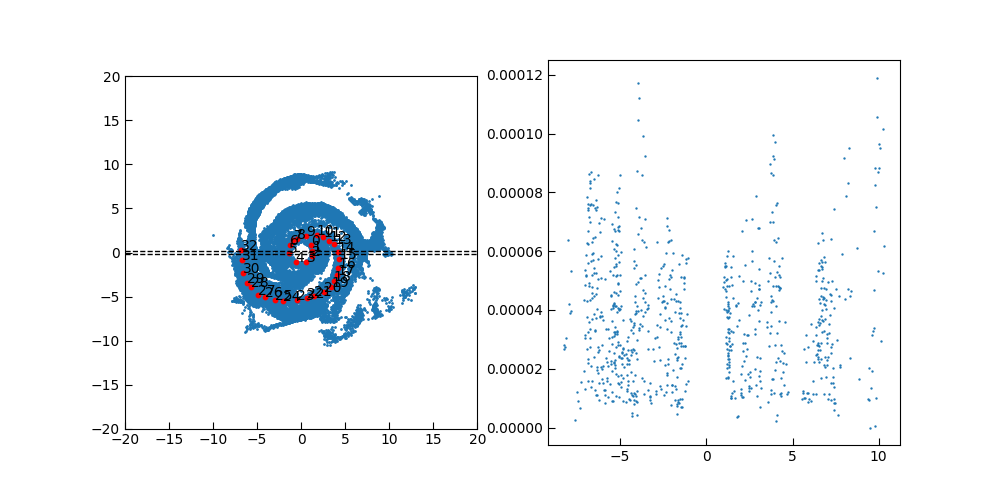

In [167]:
fig, (ax,ax2) = plt.subplots(figsize=(10,5), ncols = 2)
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm1.x, df_arm1.y, s = 10, color = 'red')
for i, row in df_arm1.iterrows():
    ax.text(row.x, row.y, str(int(row.id)))
R = 20
ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax2.scatter(Xs_band,prop_band,s=0.5,alpha=1)

ax.set_aspect('equal')

In [168]:
df_params = pd.DataFrame({
    'amplitude': [],
    'stderr_amplitude': [],
    'center': [],
    'stderr_center': [],
    'sigma': [],
    'stderr_sigma': [],
    'gamma': [],
    'stderr_gamma': [],
    'x': [],
    'y': [],
    'delta': [],
    'x_tracing': [],
    'y_tracing': [],
    'id_tracing': []
})

arm = df_arm1.copy(deep=True)

In [169]:
arm

x         y  arm  id  \
0   1.115260  0.824269    1   0   
1   1.232143  0.200893    1   1   
2   1.271104 -0.383523    1   2   
3   0.608766 -1.084821    1   3   
4  -0.637987 -1.123782    1   4   
5  -1.378247 -0.071834    1   5   
6  -1.300325  0.902192    1   6   
7  -0.871753  1.369724    1   7   
8  -0.443182  1.525568    1   8   
9   0.569805  1.876218    1   9   
10  1.777597  1.954140    1  10   
11  2.478896  1.759334    1  11   
12  3.219156  1.252841    1  12   
13  3.764610  0.980114    1  13   
14  4.154221  0.084010    1  14   
15  4.349026 -0.773133    1  15   
16  4.232143 -1.747159    1  16   
17  4.076299 -2.604302    1  17   
18  3.686688 -3.227679    1  18   
19  3.413961 -3.967938    1  19   
20  2.634740 -4.474432    1  20   
21  1.426948 -4.903003    1  21   
22  0.647727 -5.175731    1  22   
23 -0.443182 -5.448458    1  23   
24 -2.079545 -5.526380    1  24   
25 -3.014610 -5.370536    1  25   
26 -4.066558 -5.019886    1  26   
27 -4.884740 -4.786120    1  27   
28 -5.702922 -3.967938    1  28   
29 -6.131494 -3.461445    1  29   
30 -6.637987 -2.370536    1  30   
31 -6.715909 -0.890016    1  31   
32 -6.832792  0.239854    1  32   

                                        rotation_info  \
0   ({'x_rot': [0.28982218095021234, 0.31328368946...   
1   ({'x_rot': [-0.2092072640328119, -0.2106314394...   
2   ({'x_rot': [-0.6450447846799763, -0.6700759232...   
3   ({'x_rot': [-1.04951148102202, -1.100809765975...   
4   ({'x_rot': [-0.6794430694705972, -0.7206738268...   
5   ({'x_rot': [0.321747413718089, 0.3290761012189...   
6   ({'x_rot': [0.8736649989340054, 0.912269088427...   
7   ({'x_rot': [1.0390329422802398, 1.089300196608...   
8   ({'x_rot': [1.0584891206289964, 1.112349806987...   
9   ({'x_rot': [0.8420578156010585, 0.889977329551...   
10  ({'x_rot': [0.4833577508132199, 0.515872732740...   
11  ({'x_rot': [0.27010444689417545, 0.29262297083...   
12  ({'x_rot': [0.011858174719975911, 0.0217145408...   
13  ({'x_rot': [-0.11156670313963024, -0.107958104...   
14  ({'x_rot': [-0.3538053308049632, -0.3628374884...   
15  ({'x_rot': [-0.5421071556298435, -0.5613627988...   
16  ({'x_rot': [-0.7248264868922738, -0.7544523136...   
17  ({'x_rot': [-0.8500924560944947, -0.8872269249...   
18  ({'x_rot': [-0.9358786280333415, -0.9784956572...   
19  ({'x_rot': [-0.997102429288101, -1.04398588408...   
20  ({'x_rot': [-1.0459543014414094, -1.0968838681...   
21  ({'x_rot': [-1.058529239757817, -1.11238740477...   
22  ({'x_rot': [-1.0323573657176919, -1.0863519861...   
23  ({'x_rot': [-0.9600190854734011, -1.0121752766...   
24  ({'x_rot': [-0.7982414993900262, -0.8444266689...   
25  ({'x_rot': [-0.6833880697889978, -0.7247880970...   
26  ({'x_rot': [-0.5366623331299631, -0.5715988570...   
27  ({'x_rot': [-0.4282663522989817, -0.4582438253...   
28  ({'x_rot': [-0.2605035446718741, -0.2825616312...   
29  ({'x_rot': [-0.16280462257005368, -0.180130920...   
30  ({'x_rot': [0.018022166703641818, 0.0096668253...   
31  ({'x_rot': [0.24019454813754418, 0.24323311759...   
32  ({'x_rot': [0.40859849628045347, 0.42056575073...   

                                      rotation_coords     alpha  \
0   {'x_rot': [0.28982218095021234, 0.313283689464...  0.636478   
1   {'x_rot': [-0.2092072640328119, -0.21063143947...  0.161621   
2   {'x_rot': [-0.6450447846799763, -0.67007592328...  5.990147   
3   {'x_rot': [-1.04951148102202, -1.1008097659751...  5.223765   
4   {'x_rot': [-0.6794430694705972, -0.72067382687...  4.196048   
5   {'x_rot': [0.321747413718089, 0.32907610121897...  3.193666   
6   {'x_rot': [0.8736649989340054, 0.9122690884279...  2.535026   
7   {'x_rot': [1.0390329422802398, 1.0893001966080...  2.137583   
8   {'x_rot': [1.0584891206289964, 1.1123498069879...  1.853517   
9   {'x_rot': [0.8420578156010585, 0.8899773295514...  1.275950   
10  {'x_rot': [0.4833577508132199, 0.5158727327405...  0.832671   
11  {'x_rot': [0.27010444689417545, 0.292622970831...  0.617223   
12  {'x_ro

(-2.5, 2.5)

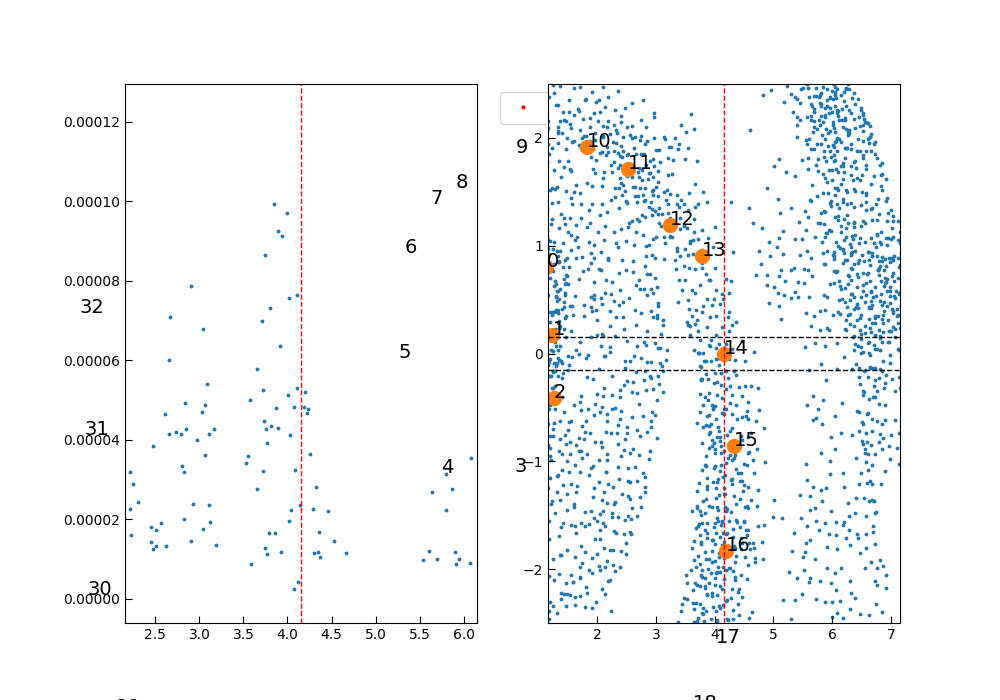

In [170]:
n= 14 #n = 86
fig, (ax,ax2) = plt.subplots(figsize=(10,7), ncols = 2)

x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
y_tracing = arm.iloc[n].This_tracingPoint_rot['y_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--', color = 'red')
x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 3, alpha = 1)
#ax.set_xlim(0,np.max(x_band)+1)
ax.set_xlim(x_tracing-2,x_tracing+2)
klicker = clicker(ax, ["limits"], markers=["o"], colors = ['red'], markersize = 2)
x_tracing_all = arm.iloc[n].All_tracingPoints_rot['x_rot']
y_tracing_all = arm.iloc[n].All_tracingPoints_rot['y_rot']
x_coords = arm.iloc[n].rotation_coords['x_rot']
y_coords = arm.iloc[n].rotation_coords['y_rot']
ax2.scatter(x_coords, y_coords, s = 3)
ax2.scatter(x_tracing_all, y_tracing_all, s = 100)
for x, y, id in zip(x_tracing_all,y_tracing_all, arm.id):
    ax2.text(x, y, str(int(id)), fontsize = 14)
   
ax2.axvline(x = x_tracing, lw = 1, ls = '--', color = 'red')
ax2.axhline(y=b/2,ls='--',lw=1,color='black')
ax2.axhline(y=-b/2,ls='--',lw=1,color='black')
R = 20
ax2.set_xlim(x_tracing-3,x_tracing+3)
ax2.set_ylim(-2.5,2.5)

In [171]:
dict_lims = klicker.get_positions()
#print(dict_lims)

In [172]:
delta = 0.05
model = get_asym_gaussian_fit(dict_lims,arm,n,delta)

/home/daniel/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


(0.0, 9.707273968044628e-05)

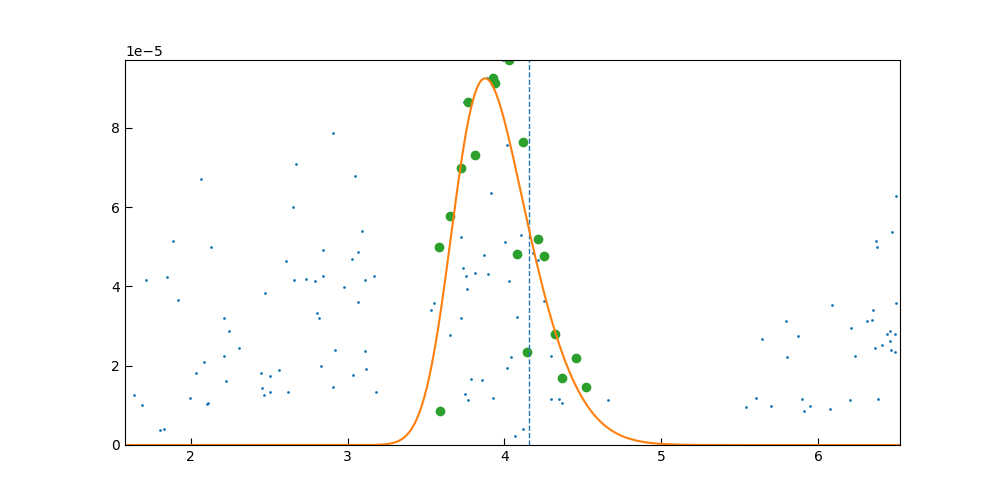

In [173]:
fig, ax = plt.subplots(figsize=(10,5))
x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--')

x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 1, alpha = 1, marker = 'o')

fitted_model = eval_fitted_model(model)
ax.plot(fitted_model['x_eval'], fitted_model['y_eval'], color = 'C1')
ax.scatter(model['x_max'], model['y_max'], color = 'C2', marker = 'o')

ax.set_xlim(np.min(fitted_model['x_eval']), np.max(fitted_model['x_eval']))
ax.set_ylim(np.min(fitted_model['y_eval']), np.max(fitted_model['y_eval'])+0.05*np.max(fitted_model['y_eval']))

In [174]:
fractured = False

df_params = add_row_with_param_info(model, df_params, arm.iloc[n], delta, fractured)

/home/daniel/Documentos/UdeA/SpiralStructure_IllustrisTNG50/ROUTINES/gauss_asym.py:137: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, pd.DataFrame.from_records([dict_values])], ignore_index=True)


In [175]:
n_actual = df_params.iloc[-1].name
params = df_params.iloc[n_actual]
params

amplitude                                                 5.65826e-05
center                                                        3.68239
delta                                                            0.05
fractured                                                       False
gamma                                                         2.35104
id_tracing                                                         14
sigma                                                        0.379363
stderr_amplitude                                          4.48539e-06
stderr_center                                                0.043941
stderr_gamma                                                  1.38155
stderr_sigma                                                 0.068322
x                   [3.5800960515646616, 3.5862422492825563, 3.656...
x_tracing                                                     4.15422
y                   [4.997125551416458e-05, 8.579382957894102e-06,...
y_tracing           

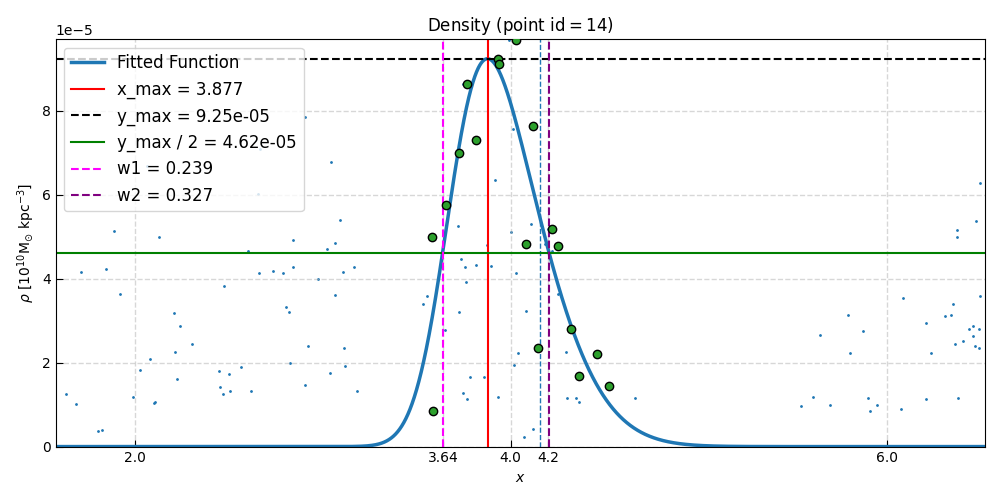

In [176]:
n_actual = df_params.iloc[-1].name
params = df_params.iloc[n_actual]
fig, ax = plt.subplots(figsize=(10,5))
x_tracing = arm.iloc[n].This_tracingPoint_rot['x_rot']
ax.axvline(x = x_tracing, lw = 1, ls = '--')

x_band = arm.iloc[n].rotated_arm_profile['x_band']
y_band = arm.iloc[n].rotated_arm_profile['y_band']
ax.scatter(x_band, y_band, s = 1, alpha = 1)

fitted_model = eval_fitted_model(model)
ax.scatter(model['x_max'], model['y_max'], color = 'C2', marker = 'o',  linewidths = 1, edgecolors = 'k', zorder = 10)

ax.set_xlim(0,np.max(x_band)+1)
plot_fit_and_widths_dani(params, ax)
ax.set_xlim(np.min(fitted_model['x_eval']), np.max(fitted_model['x_eval']))
ax.set_ylim(np.min(fitted_model['y_eval']), np.max(fitted_model['y_eval'])+0.05*np.max(fitted_model['y_eval']))

ax.set_xlabel(r'$x$')
rho_units      = r"$ \rho \ [10^{10} \mathrm{M}_{\odot} \ \mathrm{kpc}^{-3}] $"
ax.set_ylabel(rho_units)
ax.set_title(r'$\mathrm{{Density}} \ (\mathrm{{point \ id}}={{{0}}})$'.format(arm.iloc[n].id))
fig.tight_layout()
fig.savefig(f'FIT_PLOTS/rho_point_id_{n}_arm2_HALO{id_halo}_.png',dpi=200)

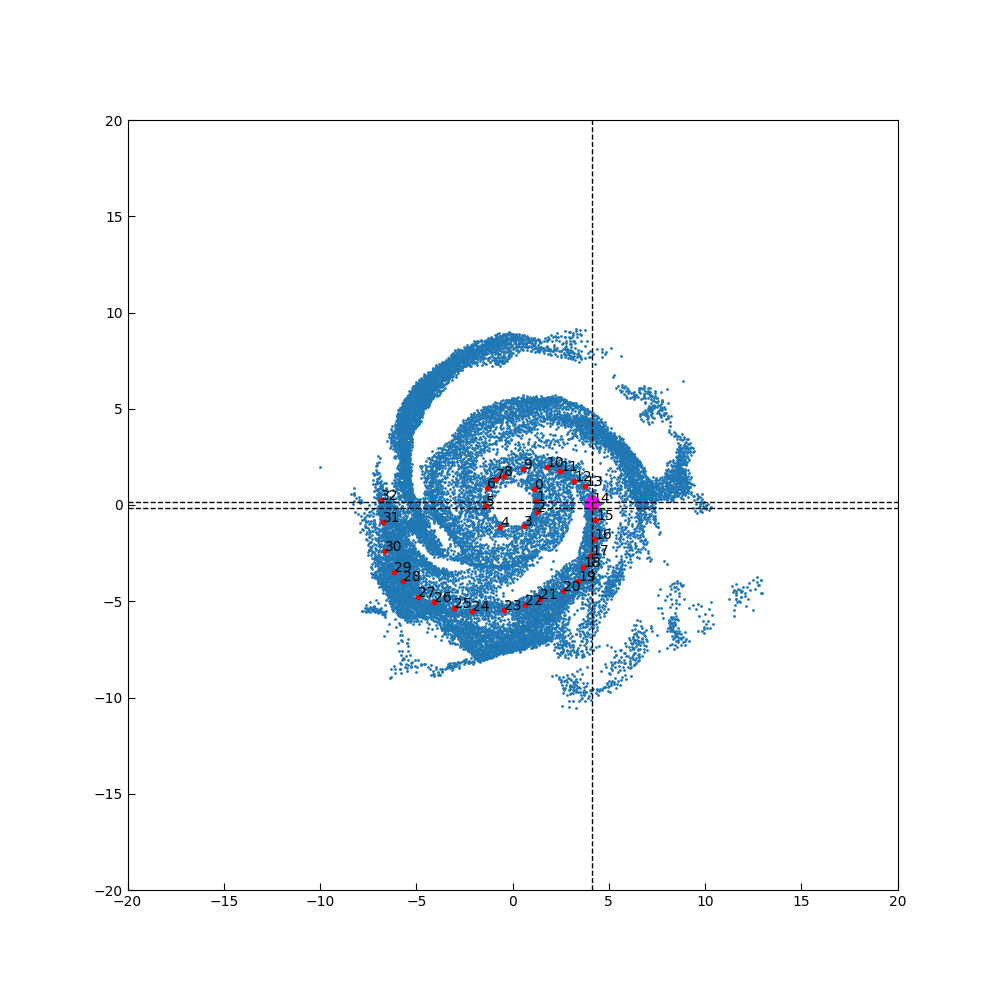

In [177]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df.x, df.y, s = 1)
ax.scatter(df_arm1.x, df_arm1.y, s = 10, color = 'red')
ax.scatter(df_params.iloc[n_actual].x_tracing,df_params.iloc[n_actual].y_tracing,color='magenta',s = 100)
ax.axvline(x=df_params.iloc[n_actual].x_tracing,ls='--',lw=1,color='black')

for i, row in df_arm1.iterrows():
    ax.text(row.x, row.y, str(int(row.id)))
R = 20
ax.axhline(y=b/2,ls='--',lw=1,color='black')
ax.axhline(y=-b/2,ls='--',lw=1,color='black')
ax.set_xlim(-R,R)
ax.set_ylim(-R,R)

ax.set_aspect('equal')

In [178]:
df_params.to_csv(f'FIT_INFO/fit_params_rho_arm1_adicionales_HALO{id_halo}_.csv', index = False)
